In [16]:
import contextlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm
from src import utils
import seaborn as sns

In [17]:
def _mkdir(root_path, folder_name):
    """Creates a folder at current path"""
    # logger = logging.getLogger(self.logger_name)
    cur_dir = os.path.join(root_path, folder_name)
    with contextlib.suppress(FileExistsError):
        os.mkdir(cur_dir)
        # logger.info(f"Entering folder: /{folder_name}")
def _make_folders(root_path, folders):
        """Make the initial folders"""
        for folder in folders:
            _mkdir(root_path, folder)
            root_path = os.path.join(root_path, folder)
        return root_path

In [18]:
# Project path
project_dir = os.path.abspath('')[:-9]
# Load enviromental variables

env_var = utils.load_env_variables(project_dir)
env_var["root_path"] = "/home/tpinho/IJGIS/Datasets/Brazil_Election_2018"

In [19]:
datasets_single = ["Original"]
few_methods = ["Optimistic"]

datasets = ["Brazil_Election_2018_Sampled_dec0.3_prob0.1",      
            "Brazil_Election_2018_Sampled_dec0.3_prob0.2",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.3",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.4",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.5",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.6",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.7",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.8",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.9",
            ]

us_corn_datasets = ["US_Corn_Yield_2016_Removed_ALABAMA",
                "US_Corn_Yield_2016_Removed_ARKANSAS",
                "US_Corn_Yield_2016_Removed_CALIFORNIA",
                "US_Corn_Yield_2016_Removed_COLORADO",
                "US_Corn_Yield_2016_Removed_DELAWARE",
                "US_Corn_Yield_2016_Removed_GEORGIA",
                "US_Corn_Yield_2016_Removed_IDAHO",
                "US_Corn_Yield_2016_Removed_ILLINOIS",
                "US_Corn_Yield_2016_Removed_INDIANA",
                "US_Corn_Yield_2016_Removed_IOWA",
                "US_Corn_Yield_2016_Removed_KANSAS",
                "US_Corn_Yield_2016_Removed_KENTUCKY",
                "US_Corn_Yield_2016_Removed_LOUISIANA",
                "US_Corn_Yield_2016_Removed_MARYLAND",
                "US_Corn_Yield_2016_Removed_MICHIGAN",
                "US_Corn_Yield_2016_Removed_MINNESOTA",
                "US_Corn_Yield_2016_Removed_MISSISSIPPI",
                "US_Corn_Yield_2016_Removed_MISSOURI",
                "US_Corn_Yield_2016_Removed_MONTANA",
                "US_Corn_Yield_2016_Removed_NEBRASKA",
                "US_Corn_Yield_2016_Removed_NEW JERSEY",
                "US_Corn_Yield_2016_Removed_NEW MEXICO",
                "US_Corn_Yield_2016_Removed_NEW YORK",
                "US_Corn_Yield_2016_Removed_NORTH CAROLINA",
                "US_Corn_Yield_2016_Removed_NORTH DAKOTA",
                "US_Corn_Yield_2016_Removed_OHIO",
                "US_Corn_Yield_2016_Removed_OKLAHOMA",
                "US_Corn_Yield_2016_Removed_PENNSYLVANIA",
                "US_Corn_Yield_2016_Removed_SOUTH CAROLINA",
                "US_Corn_Yield_2016_Removed_SOUTH DAKOTA",
                "US_Corn_Yield_2016_Removed_TENNESSEE",
                "US_Corn_Yield_2016_Removed_TEXAS",
                "US_Corn_Yield_2016_Removed_VIRGINIA",
                "US_Corn_Yield_2016_Removed_WEST VIRGINIA",
                "US_Corn_Yield_2016_Removed_WISCONSIN",
                "US_Corn_Yield_2016_Removed_WYOMING"]
                
us_corn_datasets = ["US_Corn_Yield_2016_Removed_Northeast",
                    "US_Corn_Yield_2016_Removed_Southeast",
                    "US_Corn_Yield_2016_Removed_Midwest",
                    "US_Corn_Yield_2016_Removed_Southwest",
                    "US_Corn_Yield_2016_Removed_West"]

us_wheat_datasets = ["US_Wheat_2014_Removed_Kansas",
                    "US_Wheat_2014_Removed_Montana",
                    "US_Wheat_2014_Removed_Oklahoma",
                    "US_Wheat_2014_Removed_Texas",
                    "US_Wheat_2014_Removed_Washington"]

australia_datasets = ["Australia_Election_2019_Sampled_dec0.05_prob0.1",
                "Australia_Election_2019_Sampled_dec0.05_prob0.2",
                "Australia_Election_2019_Sampled_dec0.05_prob0.3",
                "Australia_Election_2019_Sampled_dec0.05_prob0.4",
                "Australia_Election_2019_Sampled_dec0.05_prob0.5",
                "Australia_Election_2019_Sampled_dec0.05_prob0.6",
                "Australia_Election_2019_Sampled_dec0.05_prob0.7",
                "Australia_Election_2019_Sampled_dec0.05_prob0.8",
                "Australia_Election_2019_Sampled_dec0.05_prob0.9"]

scv_methods = ["CrossValidation",
               "Optimistic",
               "RegGBSCV_R_Kappa_0.0",
               "RegGBSCV_R_Kappa_0.1",
               "RegGBSCV_R_Kappa_0.2",
               "RegGBSCV_R_Kappa_0.3",  
               "RegGBSCV_R_Kappa_0.4",
               "RegGBSCV_R_Kappa_0.5",
               #"RegGBSCV_R_Kappa_0.6",
               #"RegGBSCV_R_Kappa_0.7", 
               #"RegGBSCV_R_Kappa_0.8",
               #"RegGBSCV_R_Kappa_0.9",
               #"RegGBSCV_R_Kappa_1.0",
               "TraditionalSCV"]

Dataset: Original


 22%|██▏       | 2/9 [00:00<00:00, 13.91it/s]

       INDEX  PREDICTIONS  GROUND_TRUTH fold       error
0    4200051    52.866323     58.904811   42   36.463334
1    4200101    52.909951     51.661010   42    1.559853
2    4200200    60.931098     76.536482   42  243.527999
3    4200309    57.880538     81.719230   42  568.283218
4    4200408    56.622599     67.631396   42  121.193608
..       ...          ...           ...  ...         ...
138  1508159    41.855891     60.184581   15  335.940883
139  1508209    28.502783     28.003500   15    0.249283
140  1508308    13.899175     15.892065   15    3.971610
141  1508357    17.351000     44.770488   15  751.828346
142  1508407    46.001675     57.559580   15  133.585153

[5565 rows x 5 columns]
             INDEX  PREDICTIONS  GROUND_TRUTH        error
fold                                                      
11    1.100682e+06    48.761374     64.569166   330.770437
12    1.200351e+06    24.034398     65.748834  1829.653623
13    1.302169e+06    36.733058     25.694881   197.776

 44%|████▍     | 4/9 [00:00<00:00, 14.00it/s]

       INDEX  PREDICTIONS  GROUND_TRUTH fold       error
0    4200051    56.079958     58.904811   42    7.979792
1    4200101    52.943576     51.661010   42    1.644977
2    4200200    64.930526     76.536482   42  134.698219
3    4200309    63.836289     81.719230   42  319.799553
4    4200408    59.490482     67.631396   42   66.274477
..       ...          ...           ...  ...         ...
138  1508159    36.257659     60.184581   15  572.497603
139  1508209    30.726425     28.003500   15    7.414322
140  1508308     9.322376     15.892065   15   43.160807
141  1508357    29.169972     44.770488   15  243.376103
142  1508407    42.137645     57.559580   15  237.836074

[5565 rows x 5 columns]
             INDEX  PREDICTIONS  GROUND_TRUTH        error
fold                                                      
11    1.100682e+06    50.406699     64.569166   241.378238
12    1.200351e+06    23.430933     65.748834  1882.230078
13    1.302169e+06    32.399792     25.694881   106.704

 67%|██████▋   | 6/9 [00:00<00:00, 14.12it/s]

       INDEX  PREDICTIONS  GROUND_TRUTH fold        error
0    4200051    54.160392     58.904811   42    22.509512
1    4200101    66.911374     51.661010   42   232.573618
2    4200200    50.946343     76.536482   42   654.855200
3    4200309    49.846154     81.719230   42  1015.892964
4    4200408    43.116423     67.631396   42   600.983899
..       ...          ...           ...  ...          ...
138  1508159    47.304730     60.184581   15   165.890561
139  1508209    49.949796     28.003500   15   481.639903
140  1508308    10.557003     15.892065   15    28.462884
141  1508357    10.495938     44.770488   15  1174.744773
142  1508407    36.289041     57.559580   15   452.435816

[5565 rows x 5 columns]
             INDEX  PREDICTIONS  GROUND_TRUTH        error
fold                                                      
11    1.100682e+06    52.289599     64.569166   339.652661
12    1.200351e+06    25.088522     65.748834  1959.940272
13    1.302169e+06    33.820490     25.6948

 89%|████████▉ | 8/9 [00:00<00:00, 14.19it/s]

       INDEX  PREDICTIONS  GROUND_TRUTH fold       error
0    4200051    45.378360     58.904811   42  182.964872
1    4200101    53.598602     51.661010   42    3.754264
2    4200200    63.059537     76.536482   42  181.628055
3    4200309    66.162876     81.719230   42  242.000137
4    4200408    53.883083     67.631396   42  189.016119
..       ...          ...           ...  ...         ...
138  1508159    42.504434     60.184581   15  312.587621
139  1508209    26.863292     28.003500   15    1.300074
140  1508308    22.781004     15.892065   15   47.457481
141  1508357    30.572106     44.770488   15  201.594075
142  1508407    48.506666     57.559580   15   81.955238

[5565 rows x 5 columns]
             INDEX  PREDICTIONS  GROUND_TRUTH        error
fold                                                      
11    1.100682e+06    53.834343     64.569166   150.543535
12    1.200351e+06    26.113469     65.748834  1680.501182
13    1.302169e+06    34.581335     25.694881   142.714

100%|██████████| 9/9 [00:00<00:00, 14.13it/s]

       INDEX  PREDICTIONS  GROUND_TRUTH fold       error
0    4200051    52.270774     58.904811   42   44.010444
1    4200101    50.078239     51.661010   42    2.505163
2    4200200    59.571135     76.536482   42  287.823001
3    4200309    55.338766     81.719230   42  695.928891
4    4200408    54.405720     67.631396   42  174.918500
..       ...          ...           ...  ...         ...
138  1508159    34.555927     60.184581   15  656.827920
139  1508209    28.747889     28.003500   15    0.554115
140  1508308    16.174307     15.892065   15    0.079661
141  1508357    22.983520     44.770488   15  474.671985
142  1508407    42.213261     57.559580   15  235.509508

[5565 rows x 5 columns]
             INDEX  PREDICTIONS  GROUND_TRUTH        error
fold                                                      
11    1.100682e+06    46.484122     64.569166   395.288550
12    1.200351e+06    23.518545     65.748834  1867.476130
13    1.302169e+06    36.586442     25.694881   192.362

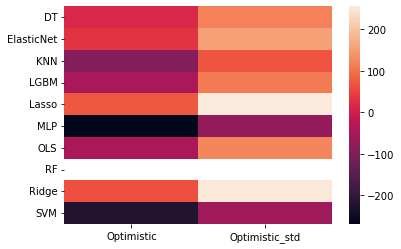

In [20]:
fs_method = "CFS_Local"
ml_methods = ["KNN", "OLS", "Lasso", "Ridge", "ElasticNet", "DT", "LGBM", "MLP", "SVM"]
#ml_methods = ["KNN"]
data_id = "INDEX"



for dataset_folder in datasets_single:
    rmse_mean = {}
    rmse_methods = pd.DataFrame(index=ml_methods, columns=scv_methods, dtype="float")
    print(f"Dataset: {dataset_folder}")
    dataset_path = os.path.join(env_var["root_path"], dataset_folder)
    out_sample = pd.read_csv(os.path.join(dataset_path, "out_of_sample_error.csv"), index_col="methods")
    #scv_methods = list(os.listdir(os.path.join(dataset_path, "results")))
    #rmse_mean["Dataset"] = rmse_mean["Dataset"] + [dataset_folder] if rmse_mean.get("Dataset") else [dataset_folder]
    #scv_methods = ["RegGBSCV_R_Kappa_2.0"]
    for ml_method in tqdm(ml_methods):
        rmse_mean["Method"] = rmse_mean["Method"] + [ml_method] if rmse_mean.get("Method") else [ml_method]
        for scv_method in few_methods:
            predictions_path = os.path.join(dataset_path, "results", scv_method, "predictions", fs_method, f"{ml_method}")
            predi_files = [os.path.join(predictions_path,c) for c in os.listdir(predictions_path)]
            predictions = pd.DataFrame()
            for file in predi_files:
                pred_fold = pd.read_csv(file)
                predictions = pd.concat([predictions, pred_fold])
            
            predictions["fold"] = predictions[data_id].apply(lambda cod: str(cod)[:2])
            predictions["error"] = (predictions["PREDICTIONS"] - predictions["GROUND_TRUTH"])**2
            #print(predictions)
            predictions = predictions.groupby(by="fold").agg("mean")
            print(predictions)
            rmse_mean[f"{scv_method}"] = rmse_mean[f"{scv_method}"] +[predictions["error"].mean()] if rmse_mean.get(f"{scv_method}") else [predictions["error"].mean()]
            rmse_mean[f"{scv_method}_std"] = rmse_mean[f"{scv_method}_std"] +[predictions["error"].std()] if rmse_mean.get(f"{scv_method}_std") else [predictions["error"].std()]
            print(rmse_mean)
    _make_folders(os.path.join(env_var["root_path"], dataset_folder), ["comparison"])
    df_rmse = pd.DataFrame(rmse_mean)
    df_rmse.set_index("Method", inplace=True)

    df_rmse.to_csv(os.path.join(env_var["root_path"], dataset_folder, "comparison", "Local_RMSE_Mean_Removing.csv"))
    df_rmse.rank().to_csv(os.path.join(env_var["root_path"], dataset_folder, "comparison", "Rank.csv"))
    rmse_methods = df_rmse.sub(out_sample["mean"], axis="index")
    rmse_methods.to_csv(os.path.join(env_var["root_path"], dataset_folder, "comparison", "RMSE_DIFF.csv"))
    fig = sns.heatmap(rmse_methods)
    fig.figure.savefig(os.path.join(env_var["root_path"], dataset_folder, "comparison", "RMSE_DIFF.jpg"))

